In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

#  for file in os.listdir("C:/Users/tahir/Documents/Python Datasets/Retail Data"):
#      if file.endswith(".csv"):
#          tmp = pd.read_csv(os.path.join("C:/Users/tahir/Documents/Python Datasets/Retail Data", file))
#          tmp.to_csv("C:/Users/tahir/Documents/Python Datasets/Retail Data/Merged.csv", index = False, header = True, mode = 'a')


df = pd.read_csv("C:/Users/tahir/Documents/Python Datasets/Retail Data/Merged.csv")


In [3]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186316,186316,186316,186316,186316,186316
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,366,21903,168552,21903,366,366


In [4]:
#Drop NaN values
#Drop Or values

nan_df = df[df.isna().any(axis = 1)]

df = df.dropna(how='all')

df = df[df['Order Date'].str[0:2] != 'Or']
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
#Add month column

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype("int32")




# What was the best month for sales? How much was earned that month?

# Add a sales column

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

results = df.groupby('Month').sum()



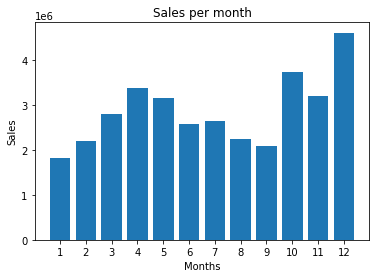

In [6]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales per month')
plt.show()

In [7]:
#Which State sold the maximum product?

df['State'] = df['Purchase Address'].str[-8:-6]
df_state_sales = df.groupby(df['State']).sum()
df_state_sales.drop(['Quantity Ordered','Month','Price Each'], axis=1)


#Which city sold the most product

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df_city_sales = df.groupby('City').sum()
df_city_sales.drop(['Quantity Ordered','Month','Price Each'], axis=1)




,Sales
City,
Atlanta,2.795499e+06
Austin,1.819582e+06
Boston,3.661642e+06
Dallas,2.767975e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Portland,2.320491e+06
San Francisco,8.262204e+06
Seattle,2.747755e+06


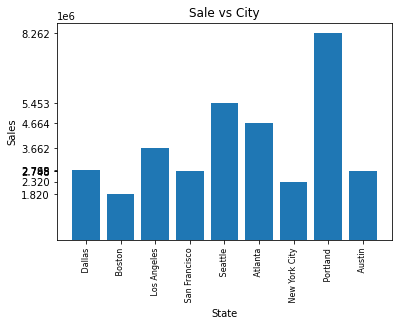

In [34]:
# Make Plots of city and state with sales

cities = df['City'].unique()

plt.bar(cities, df_city_sales['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('State')
plt.ylabel('Sales')
plt.yticks(df_city_sales['Sales'])
plt.title('Sale vs City')
plt.show()